# Method of Medial Axis transformation(Mat) on binary images

In [1]:
def applyMedialAxis(image):
    image = img_as_bool(color.rgb2gray(image))
    out = morphology.medial_axis(image)

    f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                             sharex=True, sharey=True)
    ax0.imshow(image, cmap='gray', interpolation='nearest')
    ax1.imshow(out, cmap='gray', interpolation='nearest')
    plt.show()

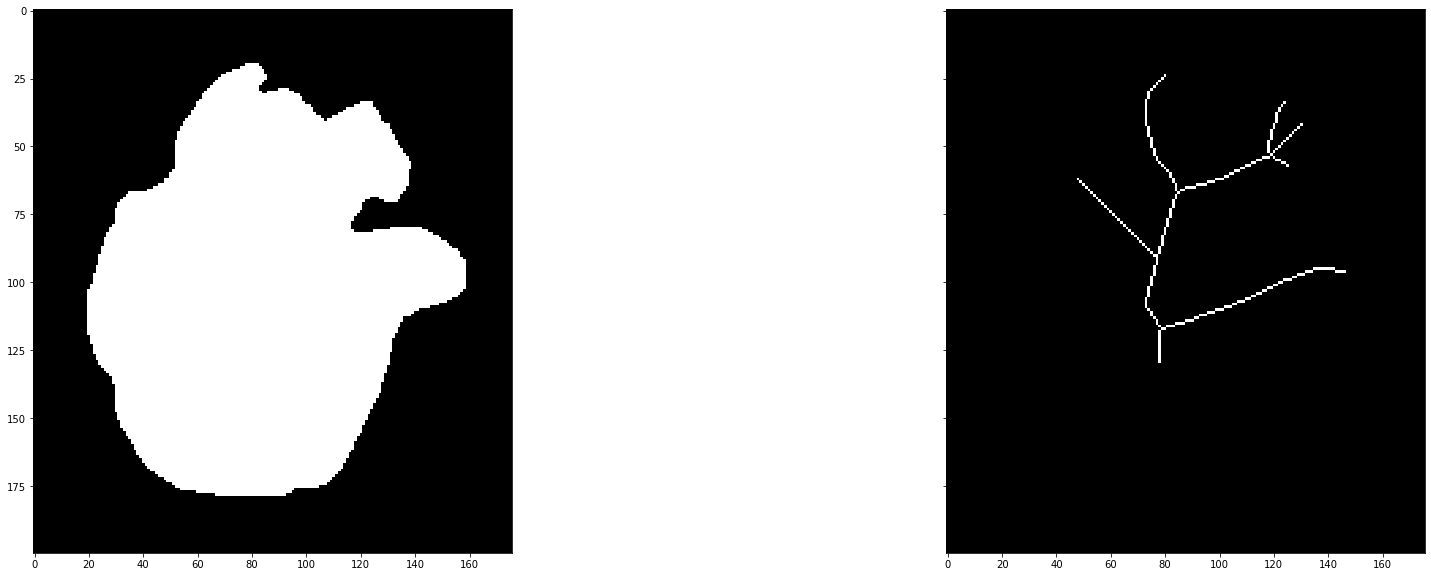

In [2]:
from skimage import img_as_bool, io, color, morphology
from skimage.util import invert
import matplotlib.pyplot as plt
import numpy as np

CIBUv = io.imread('CIBUv.png')[:,:,:3]
applyMedialAxis(CIBUv)


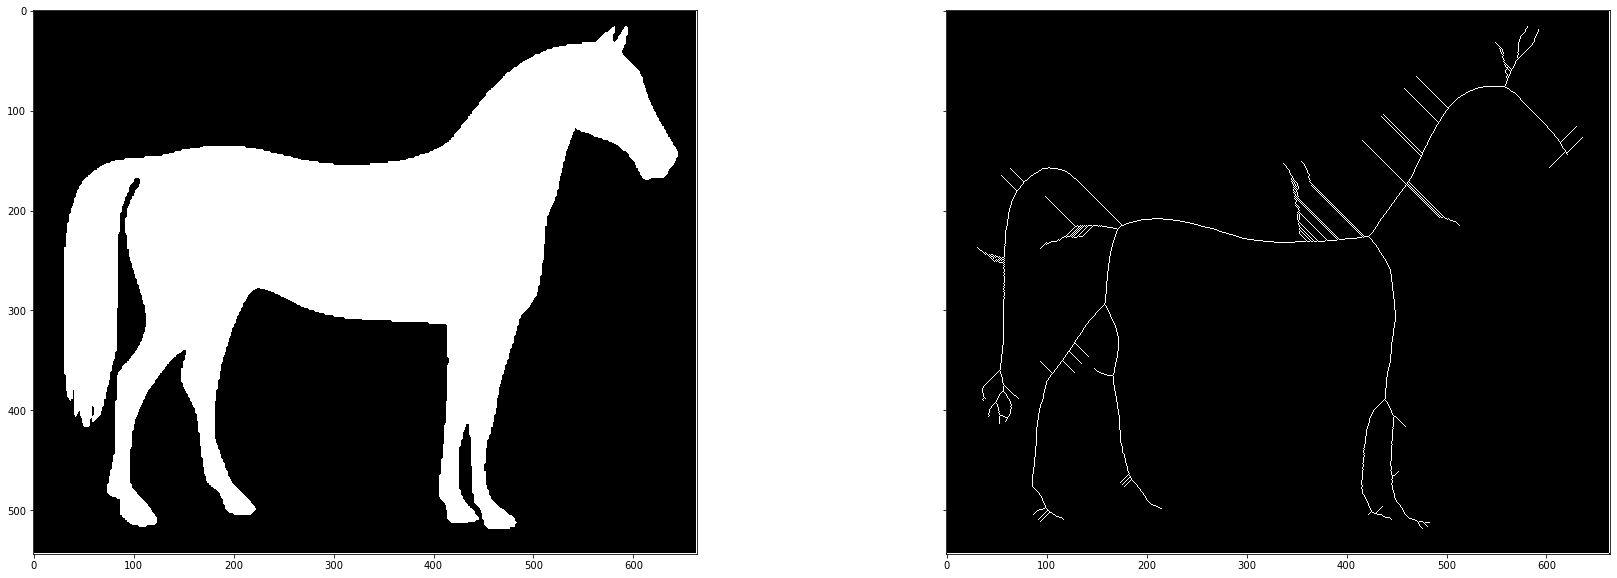

In [3]:
horse = io.imread('horse.png')[:,:,:3]
applyMedialAxis(horse)

# Method of Medial Axis transformation(Mat) on color images

In [4]:
import cv2
def skeleton_Mat(image):
    imageBlur = cv2.medianBlur(image,5)
    th2 = cv2.adaptiveThreshold(imageBlur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    
    imageBool = img_as_bool(th2)
    out = morphology.medial_axis(imageBool)
    
    f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(60, 40),
                             sharex=True, sharey=True)
    ax0.imshow(image, cmap='gray', interpolation='nearest')
    ax1.imshow(out, cmap='gray', interpolation='nearest')
    plt.show()


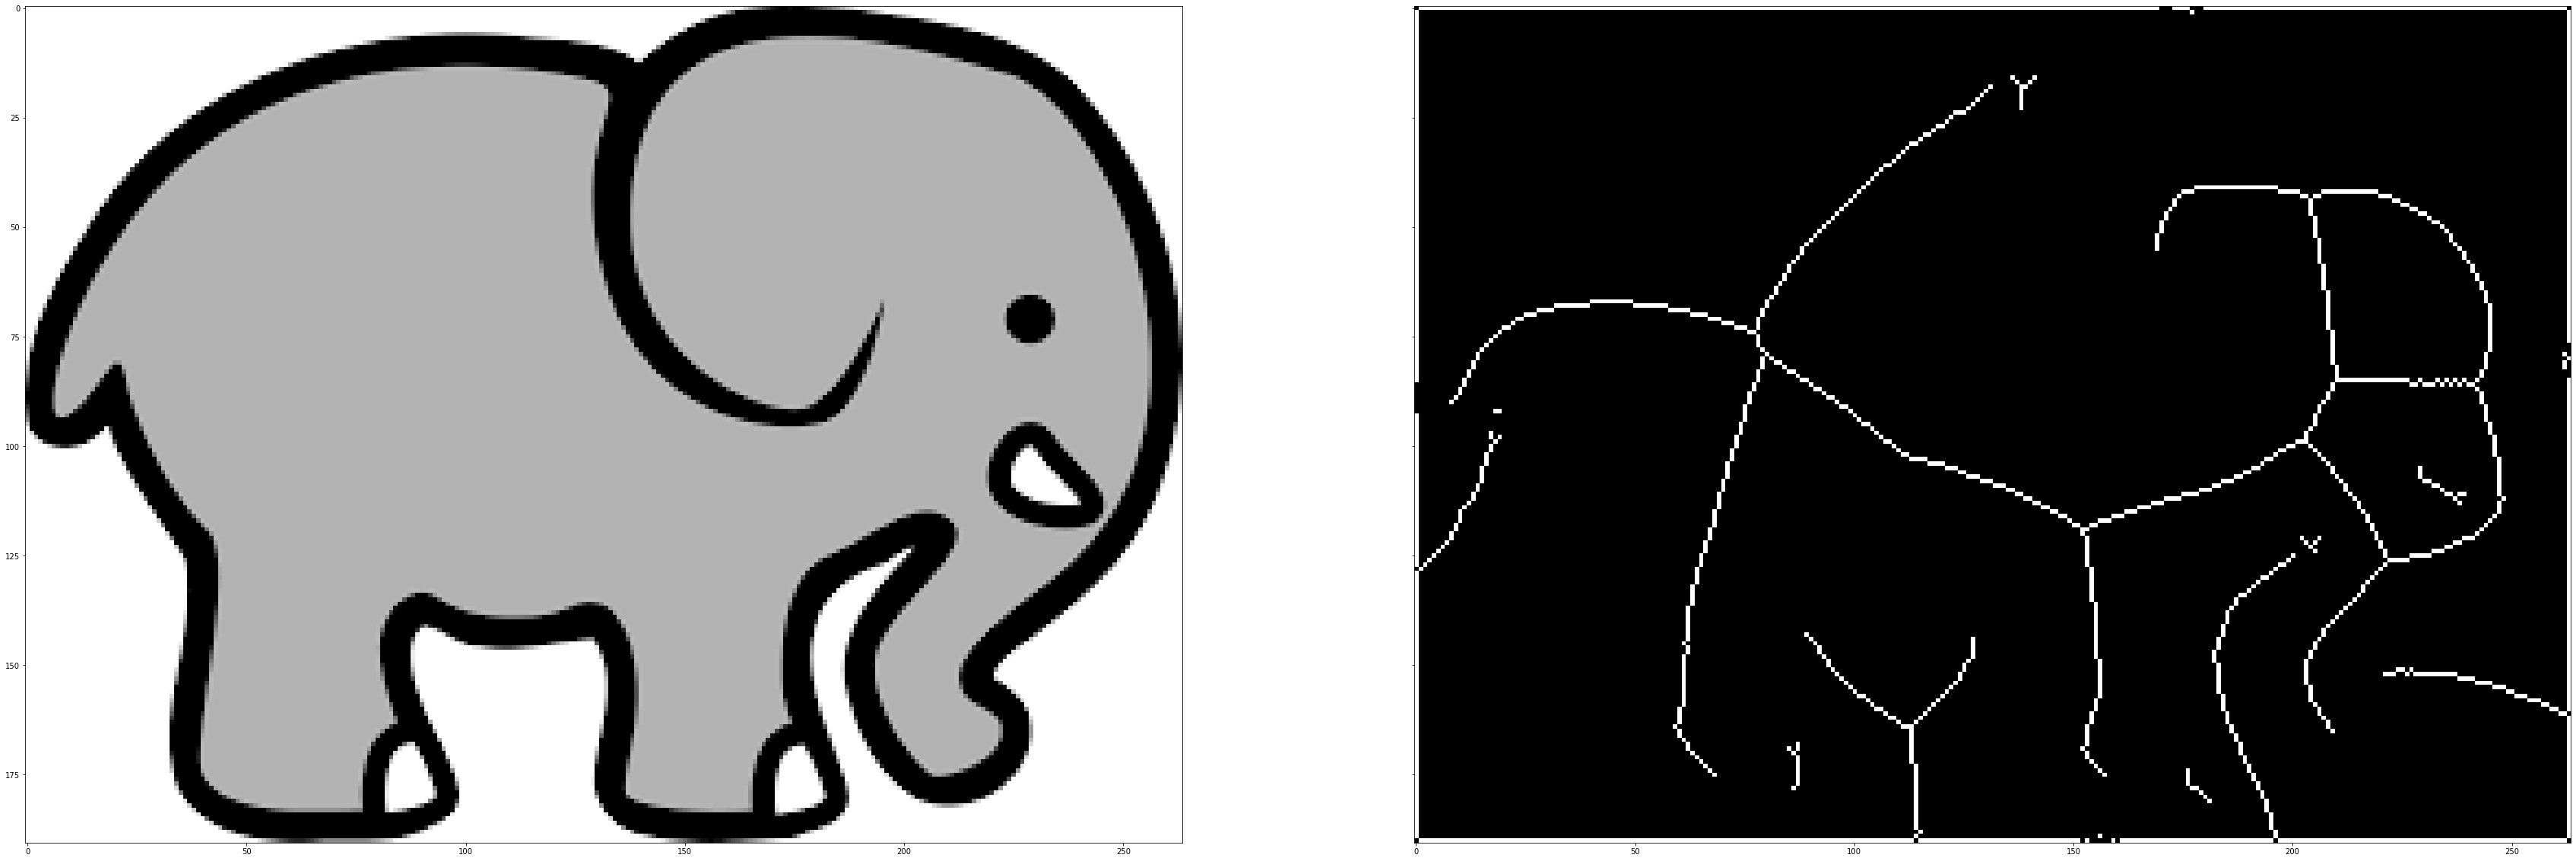

In [5]:
import cv2
img = cv2.imread('elephant.png',0)
skeleton_Mat(img)

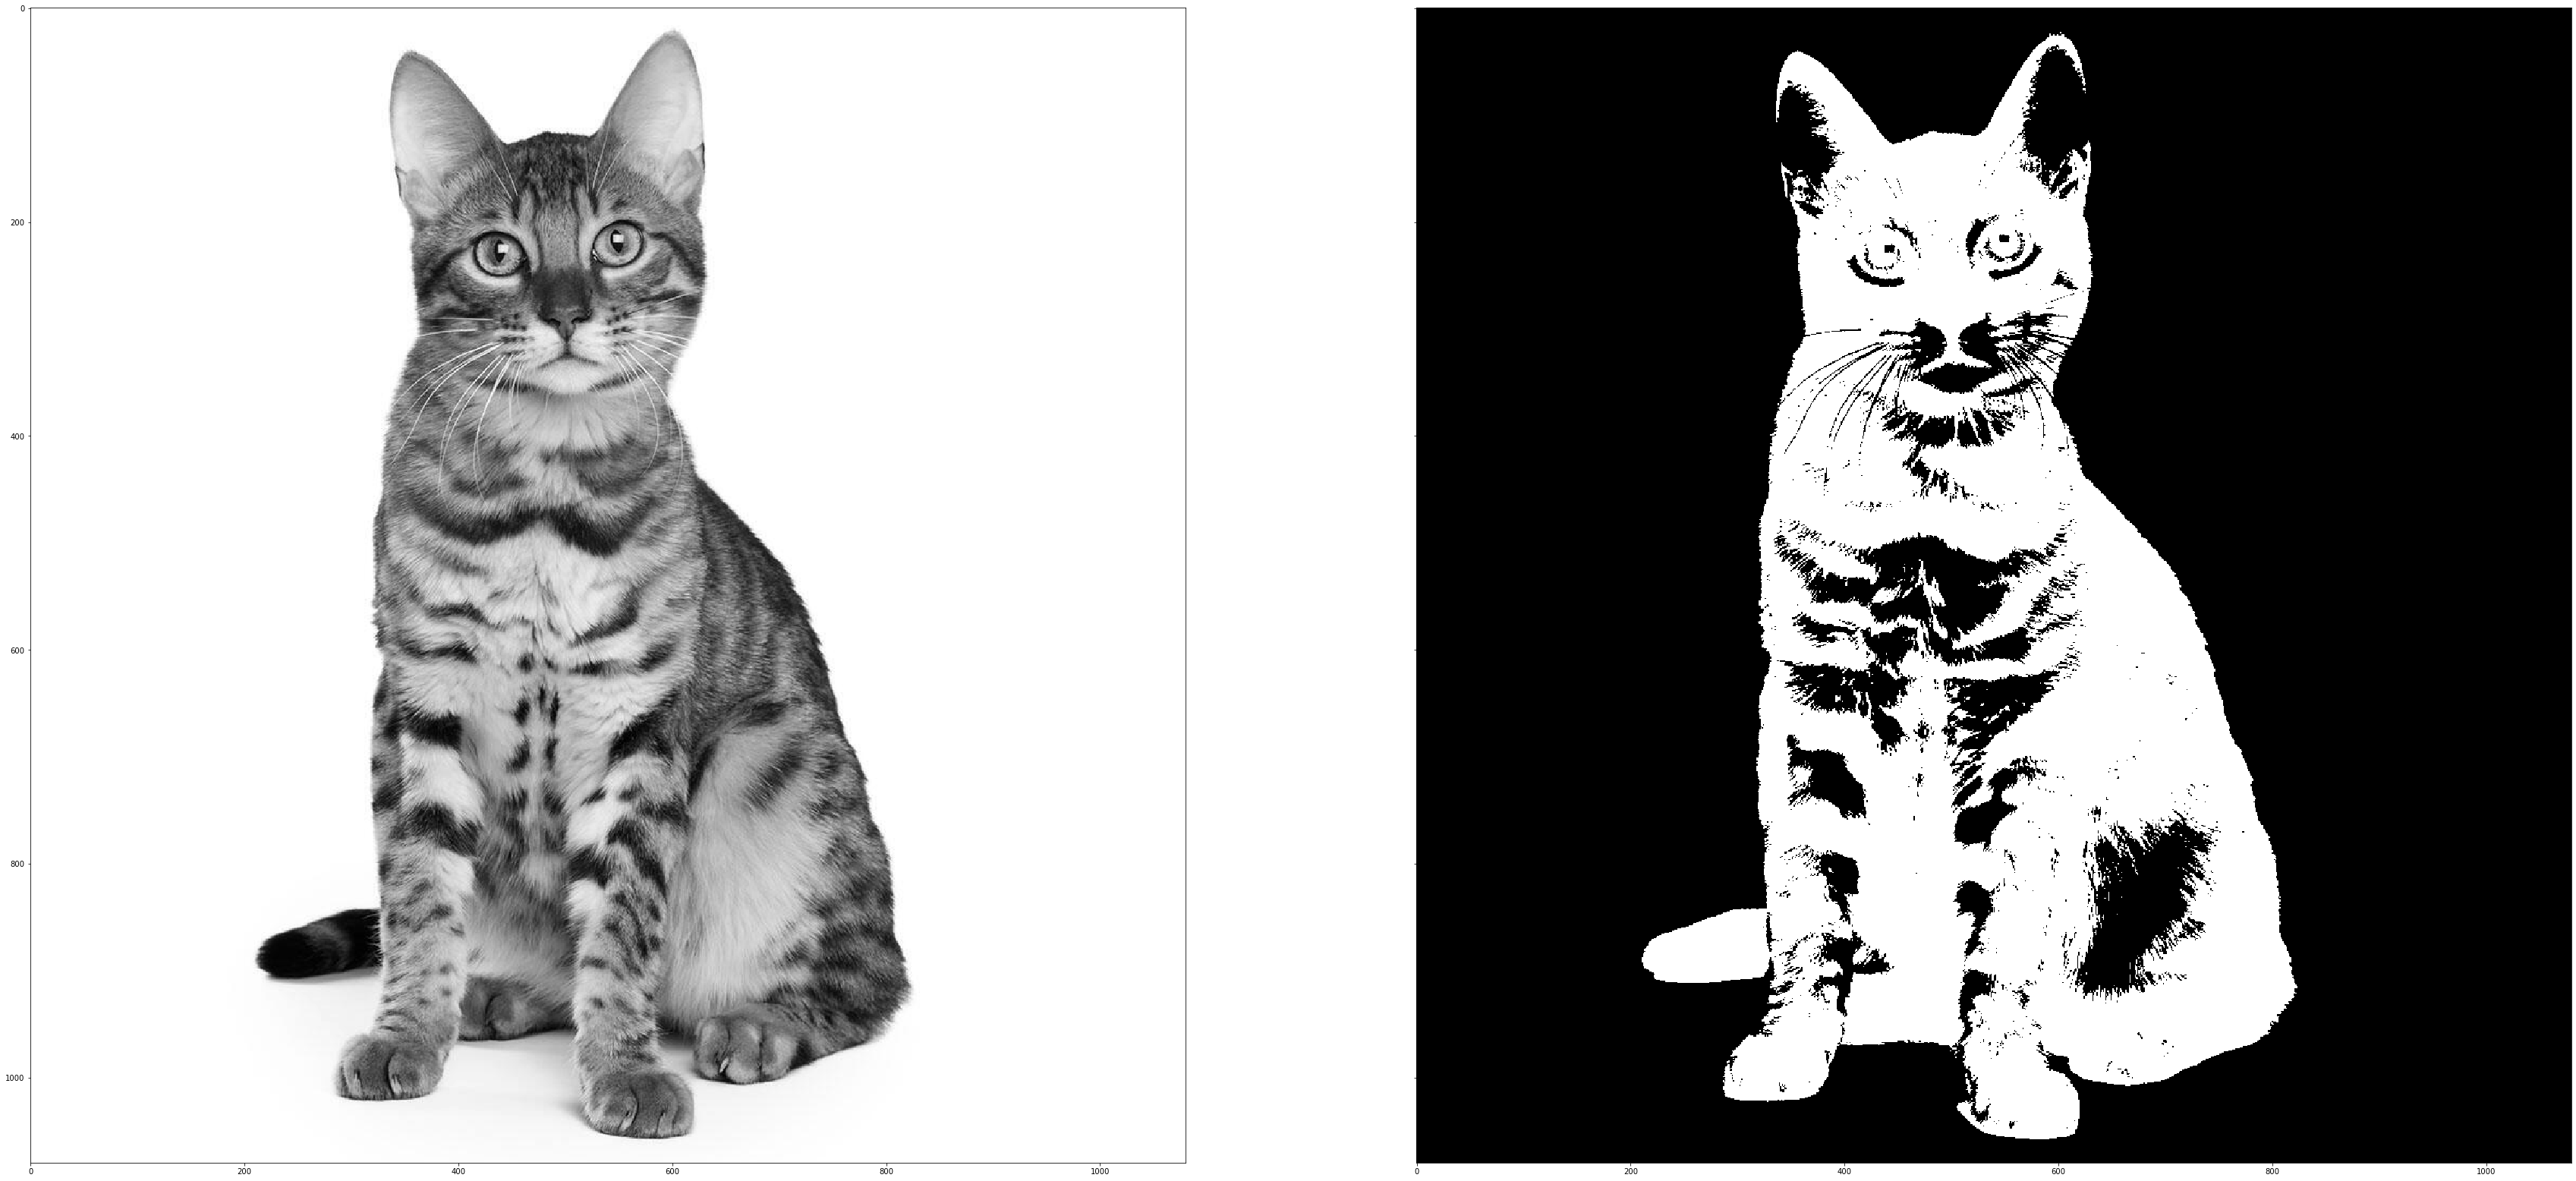

In [6]:
img = cv2.imread('cat.jpeg')
img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(_, binarized) = cv2.threshold(img_gray,
 0,
255,
cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(60, 40),
                         sharex=True, sharey=True)
ax0.imshow(img_gray, cmap='gray', interpolation='nearest')
ax1.imshow(binarized, cmap='gray', interpolation='nearest')
plt.show()


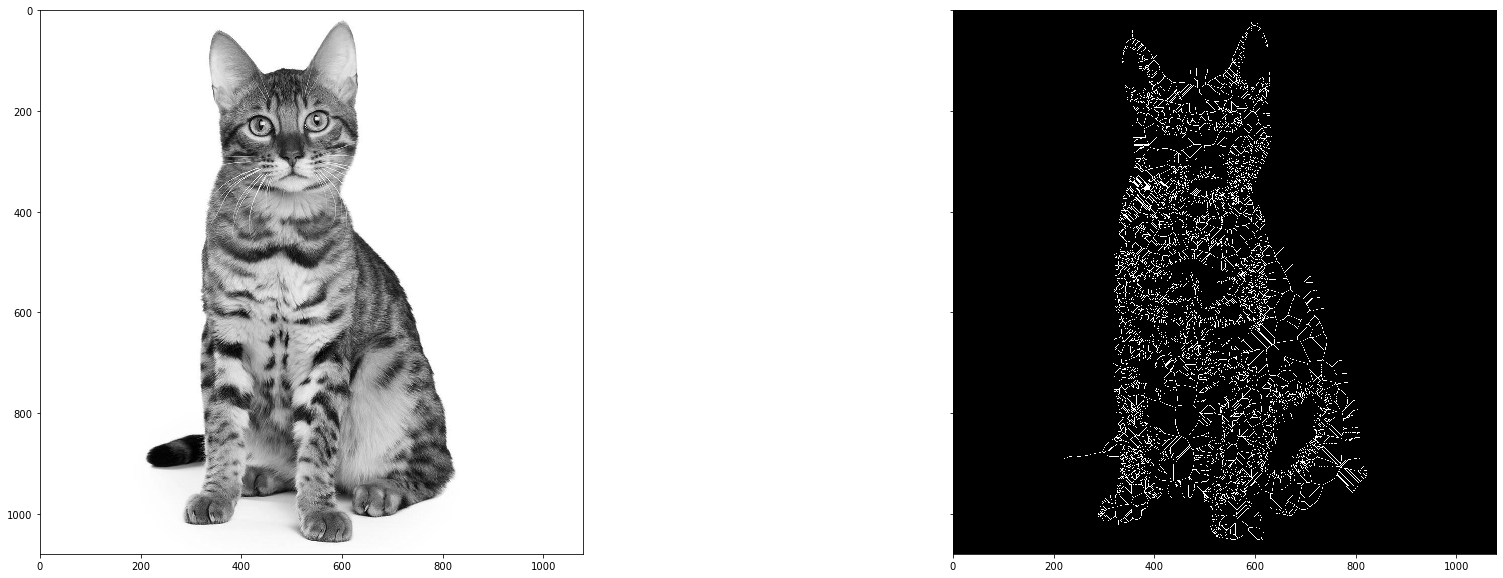

In [7]:
image = img_as_bool(binarized)
out = morphology.medial_axis(image)

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(img_gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

In [8]:
!pip install rembg

In [9]:
from rembg import remove
def medialAxis_Colored(image):
    output = remove(image)
    gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,70,255,0)
    image = img_as_bool(thresh)
    out = morphology.medial_axis(image)
    f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
    ax0.imshow(gray, cmap='gray', interpolation='nearest')
    ax1.imshow(out, cmap='gray', interpolation='nearest')
    plt.show()

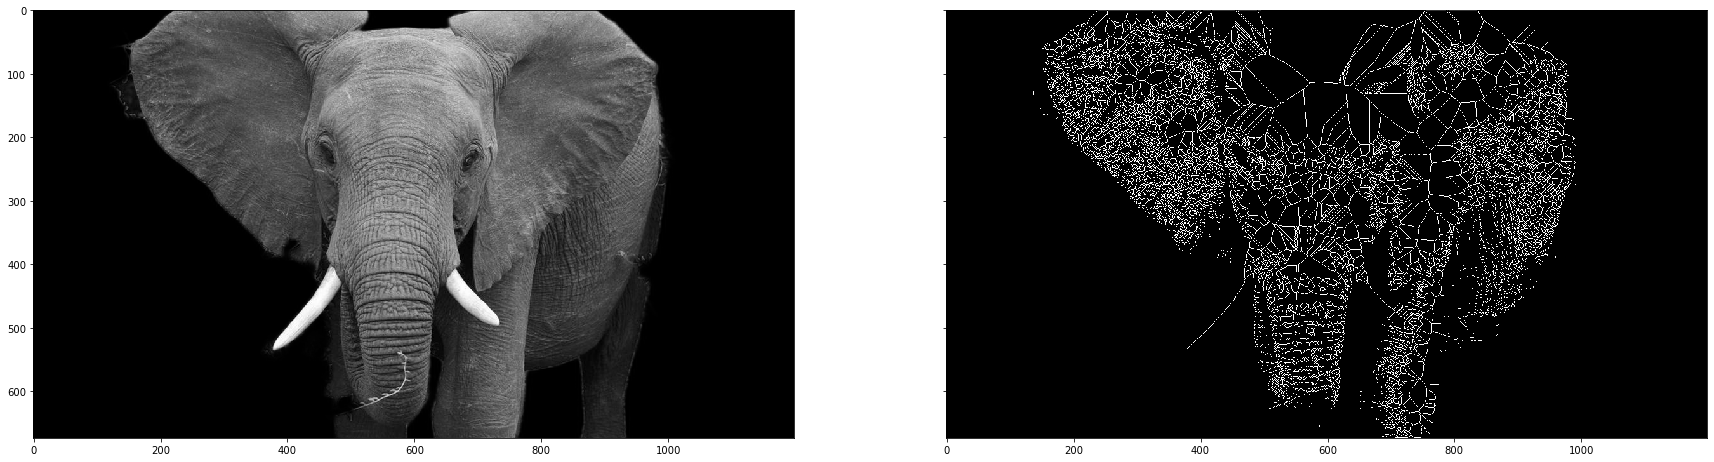

In [10]:
input = cv2.imread('elephant.jpeg')
medialAxis_Colored(input)

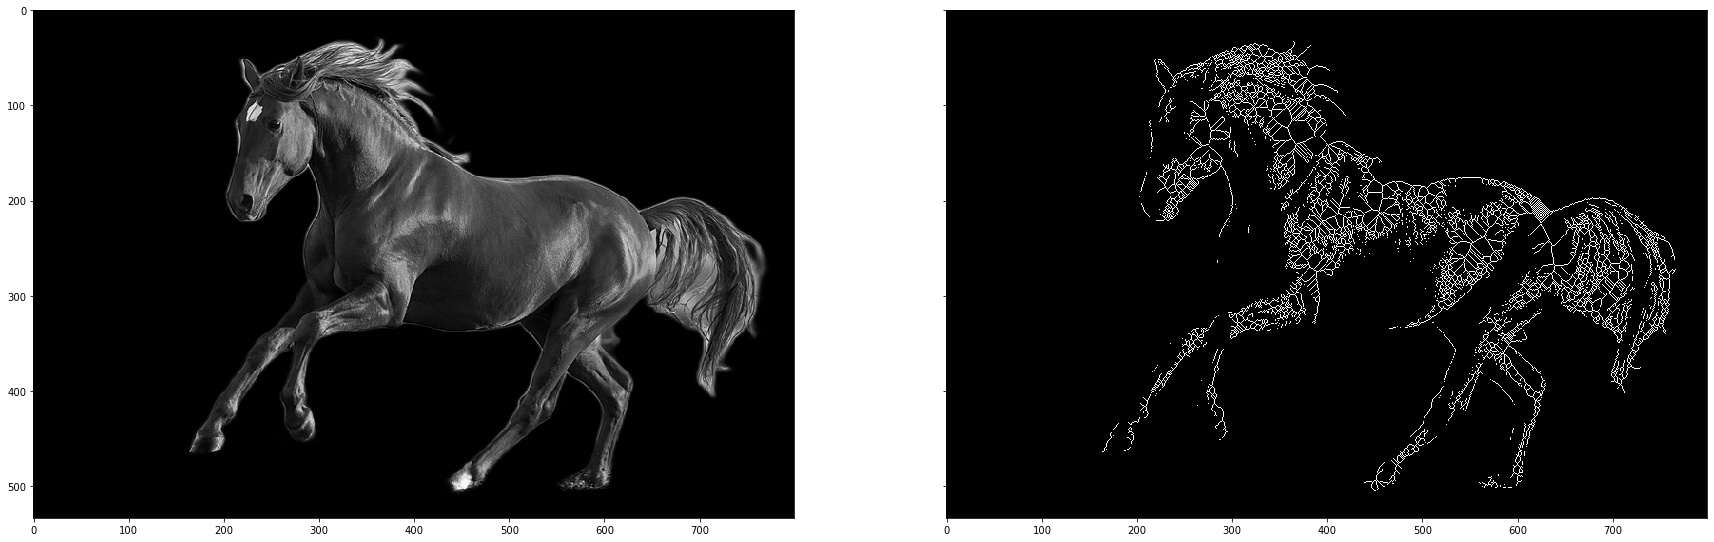

In [11]:
input = cv2.imread('horse.jpeg')
medialAxis_Colored(input)

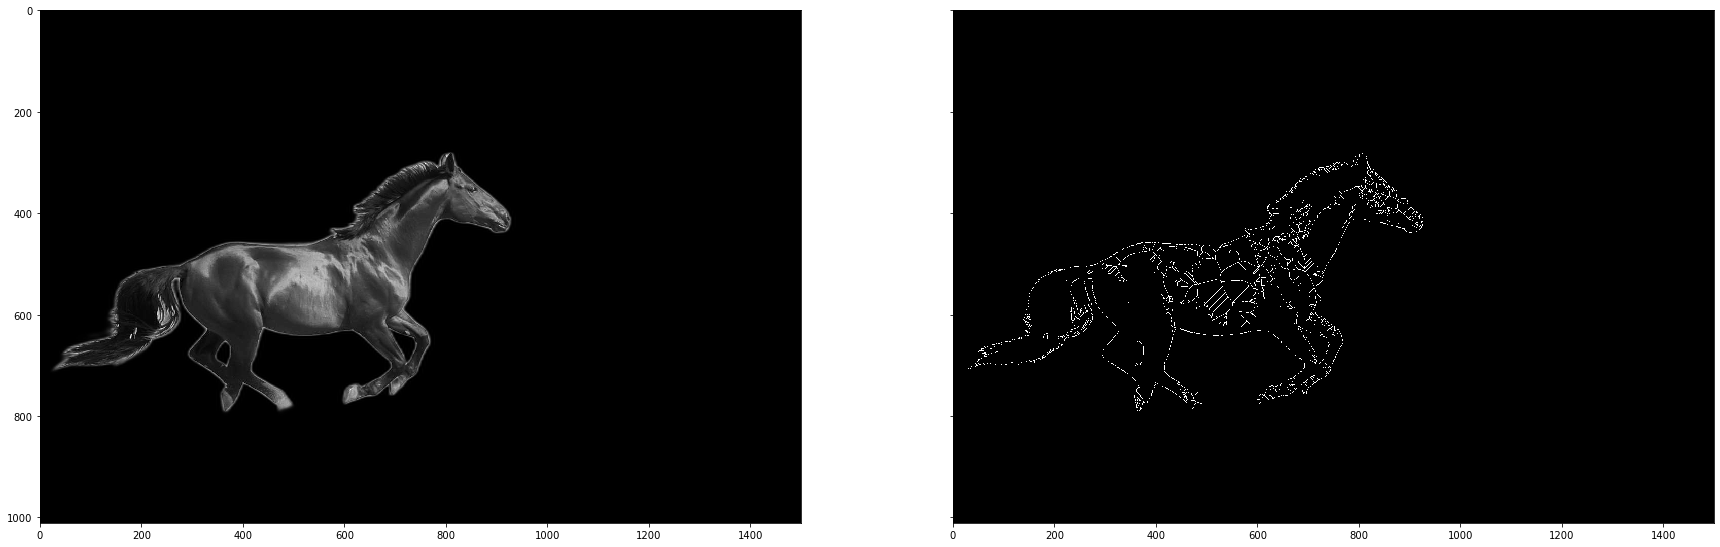

In [12]:
input = cv2.imread('horse1.jpeg')
medialAxis_Colored(input)

# Applying Opening operation on binary images

In [13]:
def skeletonize_Opening(image, size, structuring=cv2.MORPH_RECT):
    area = image.shape[0] * image.shape[1]
    skeleton = np.zeros(image.shape, dtype="uint8")
    elem = cv2.getStructuringElement(structuring, size)

    while True:
        eroded = cv2.erode(image, elem)
        temp = cv2.dilate(eroded, elem)

        temp = cv2.subtract(image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        image = eroded.copy()

        if area == area - cv2.countNonZero(image):
            break

    return skeleton

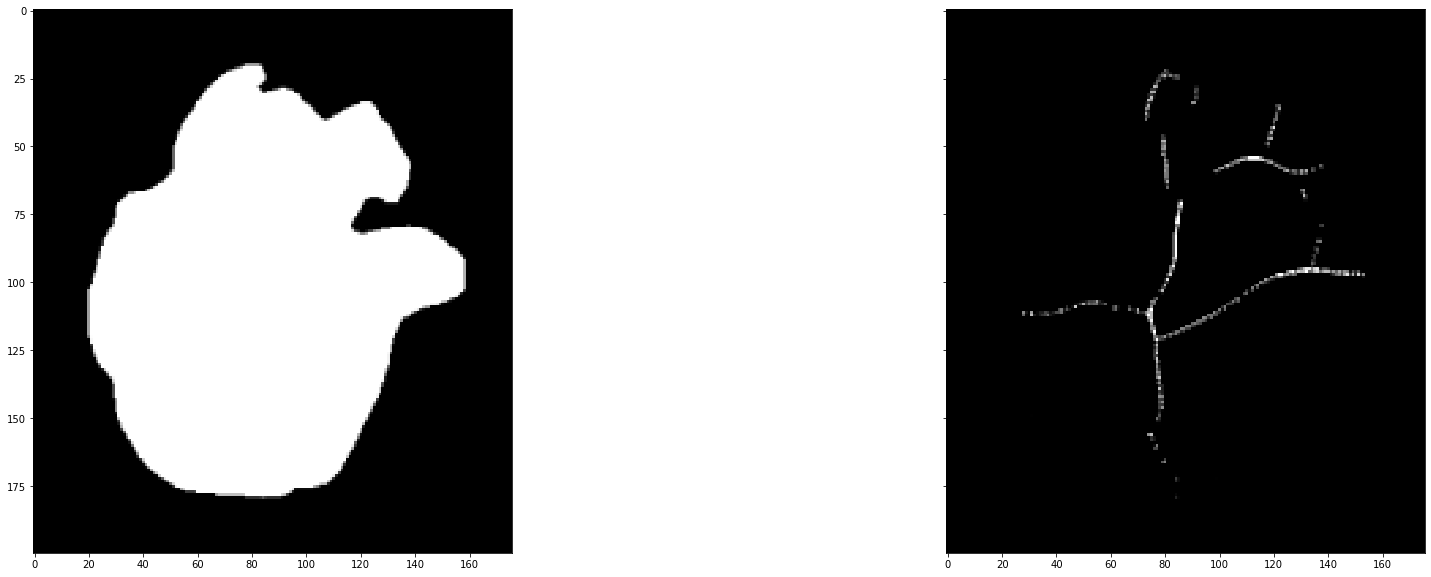

In [14]:
original = io.imread('CIBUv.png')
grayimg = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

skeleton = skeletonize_Opening(grayimg,size=(3, 3))
f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(original, cmap='gray', interpolation='nearest')
ax1.imshow(skeleton, cmap='gray', interpolation='nearest')
plt.show()

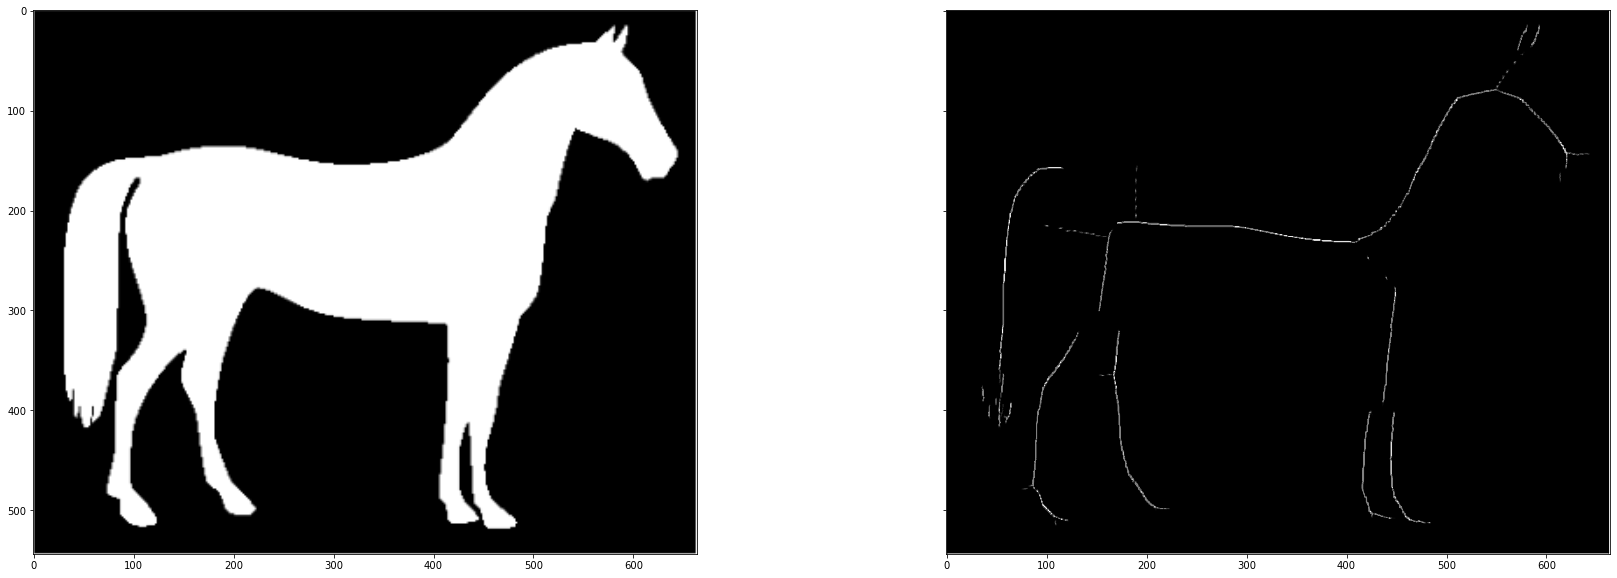

In [15]:
horse_original = io.imread('horse.png')
grayimg = cv2.cvtColor(horse_original, cv2.COLOR_BGR2GRAY)

out = skeletonize_Opening(grayimg,size=(3, 3))
f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(horse_original, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

# Applying Opening operation on color images

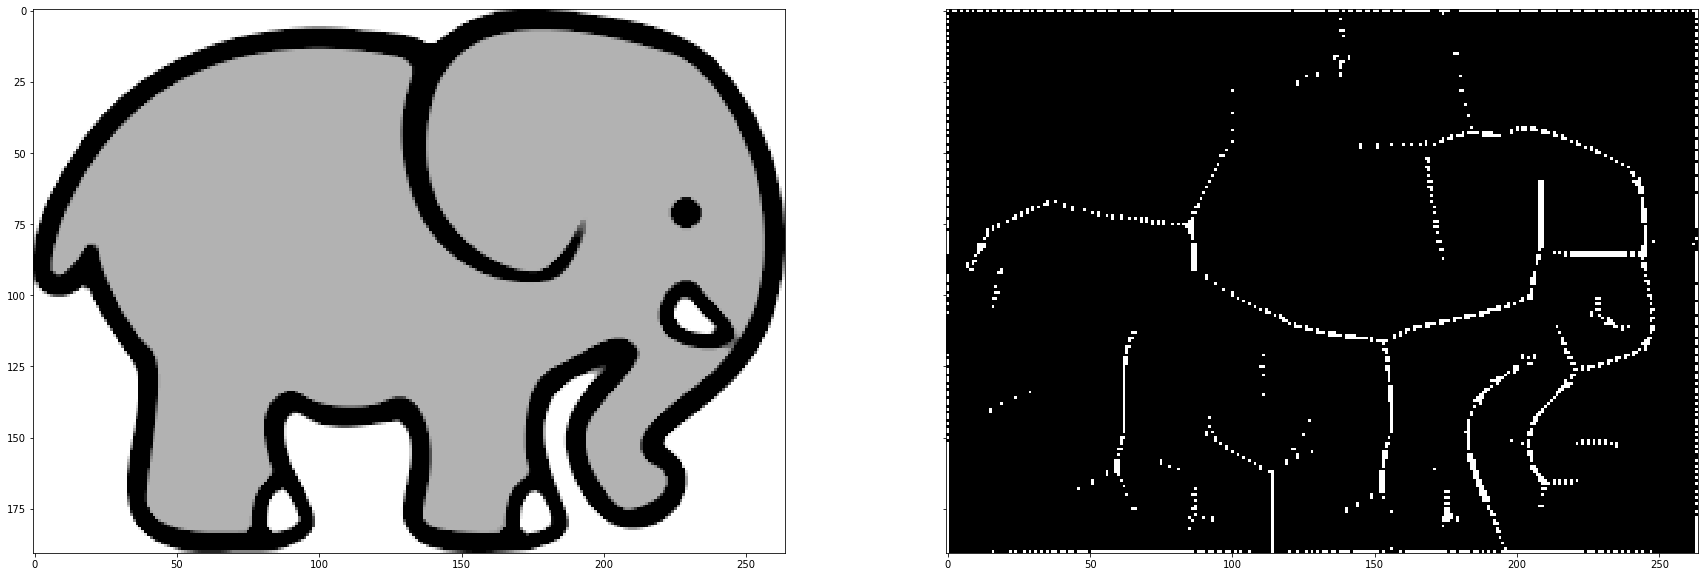

In [16]:
import cv2
img = cv2.imread('elephant.png',0)
img = cv2.medianBlur(img,5)
elephant_th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
out = skeletonize_Opening(elephant_th,size=(3, 3))
f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(img, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

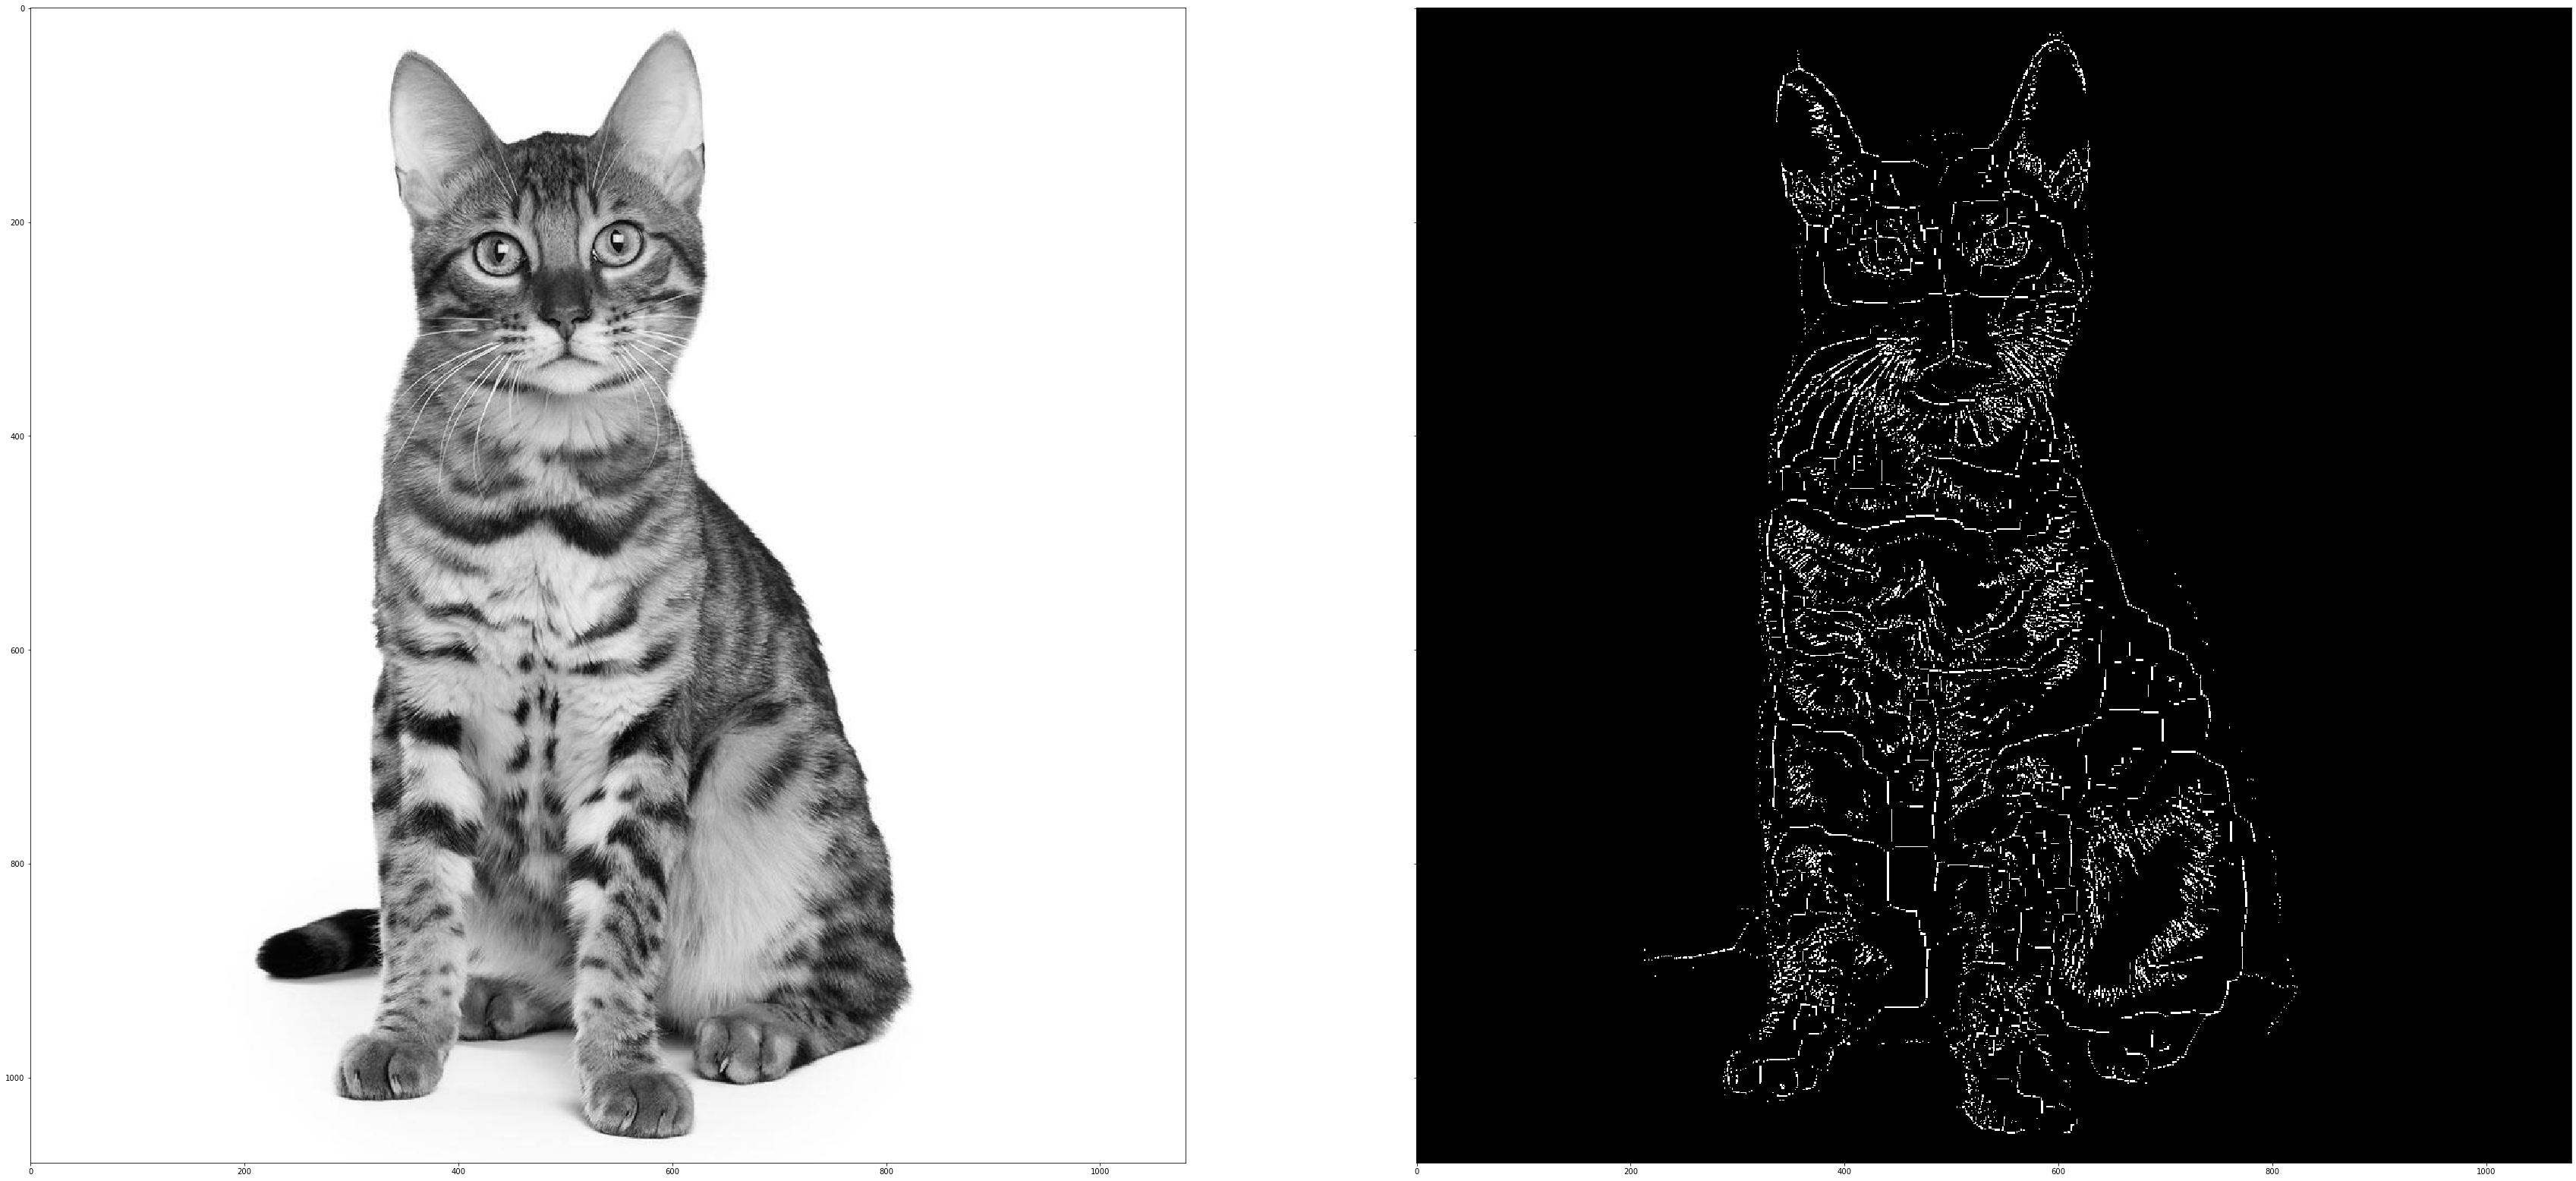

In [17]:
img = cv2.imread('cat.jpeg')
img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(_, binarized) = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
out = skeletonize_Opening(binarized,size=(3, 3))

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(60, 40),
                         sharex=True, sharey=True)
ax0.imshow(img_gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

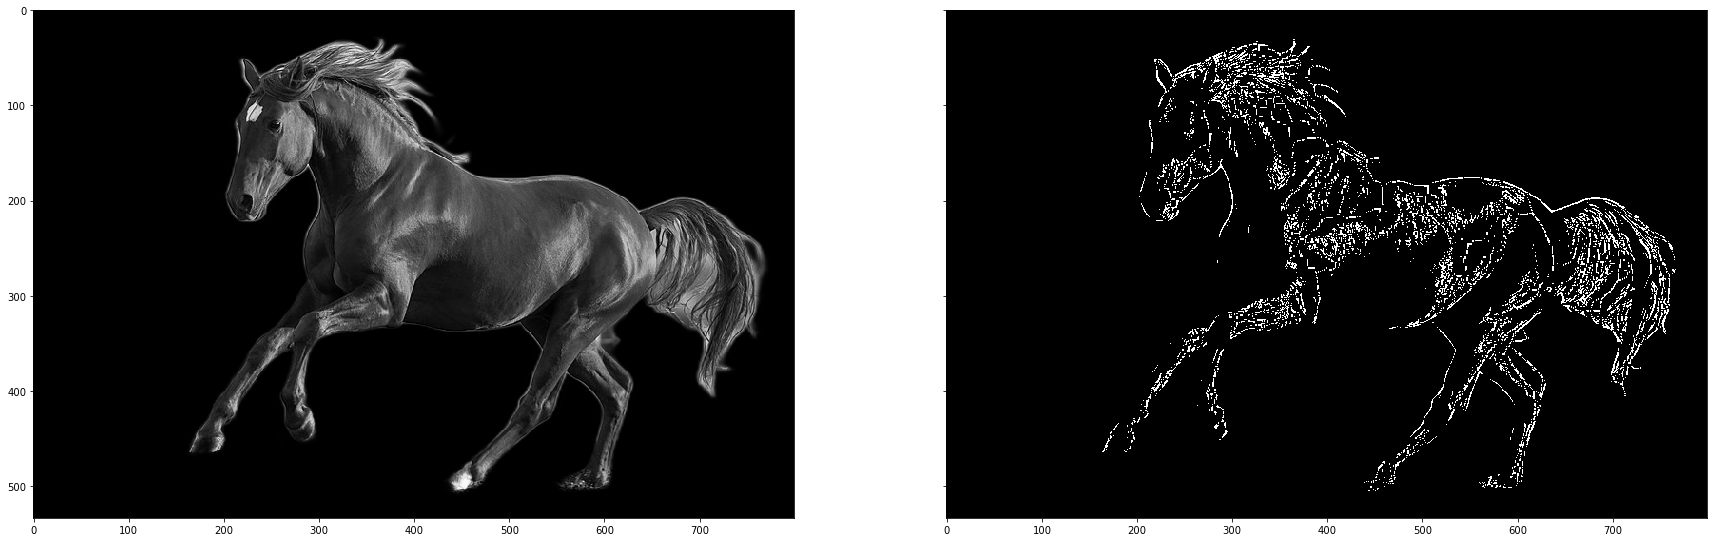

In [18]:
input = cv2.imread('horse.jpeg')
output = remove(input)

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

out = skeletonize_Opening(thresh,size=(3, 3))

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

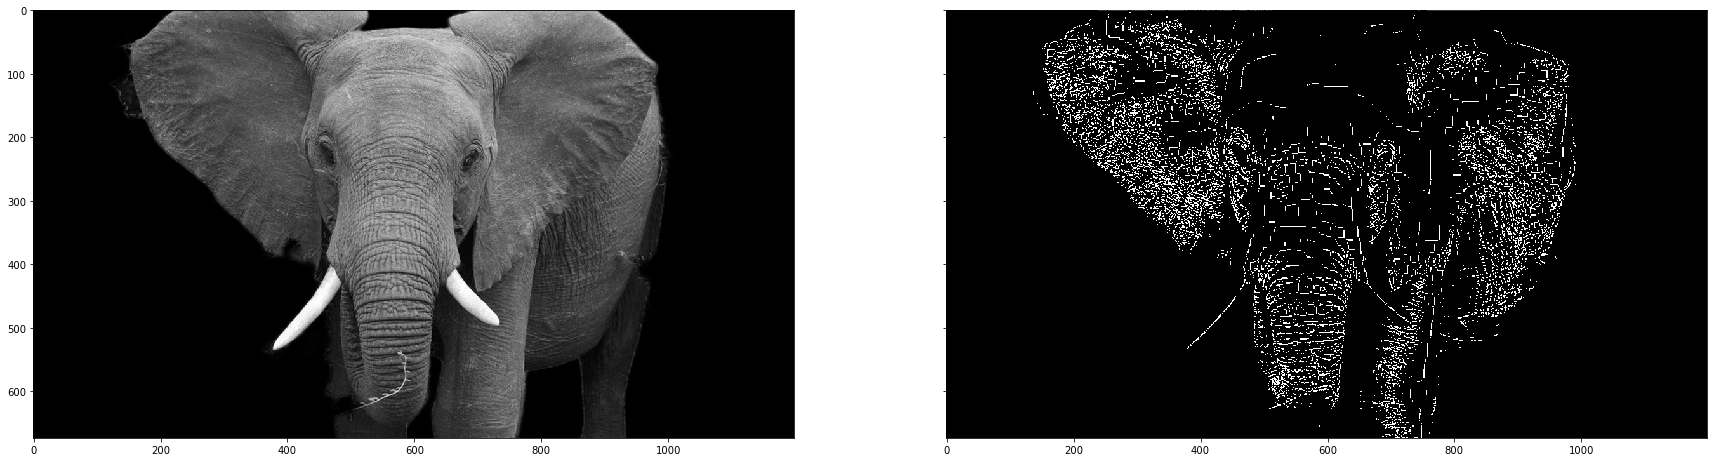

In [19]:
input = cv2.imread('elephant.jpeg')
output = remove(input)

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

out = skeletonize_Opening(thresh,size=(3, 3))

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

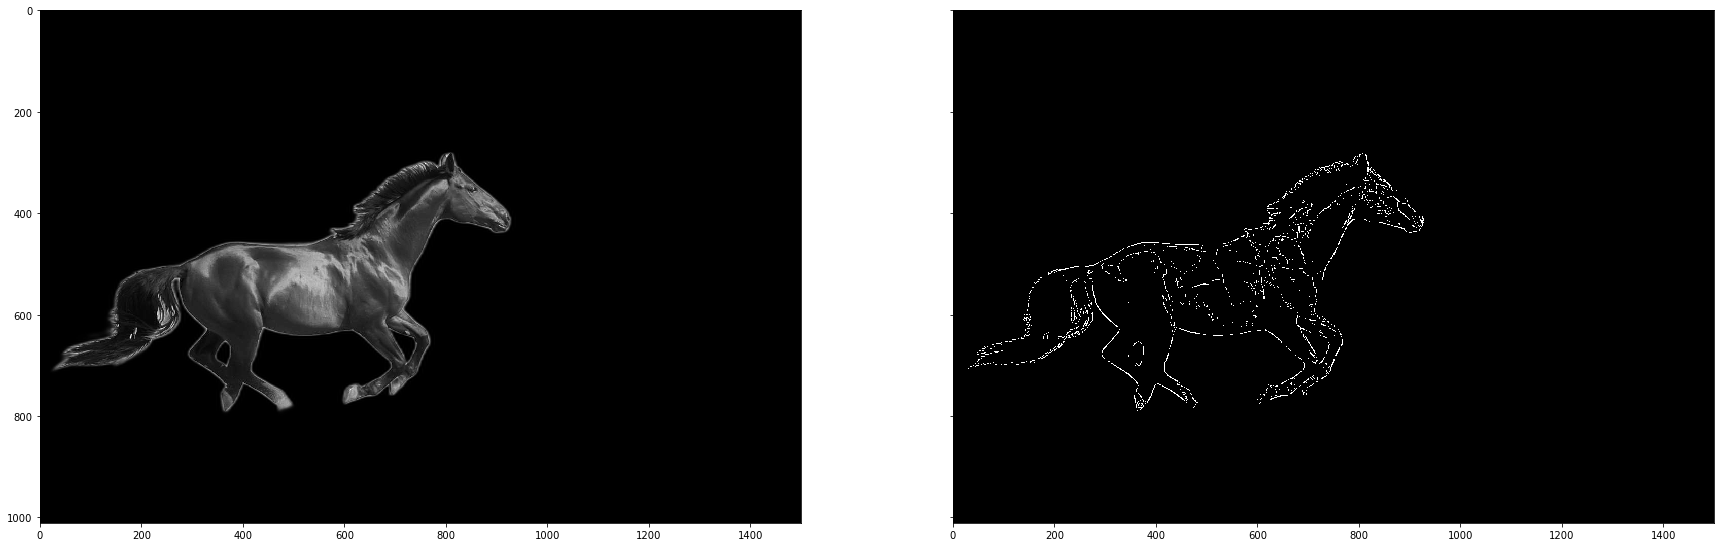

In [20]:
input = cv2.imread('horse1.jpeg')
output = remove(input)

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

out = skeletonize_Opening(thresh,size=(3, 3))

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

# Applying Thinning operation on binary images

In [21]:
def thinningBinary(image):
    image = img_as_bool(color.rgb2gray(image))
    skeleton = skeletonize(image)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10),
                             sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('original', fontsize=20)

    ax[1].imshow(skeleton, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('skeleton', fontsize=20)

    fig.tight_layout()
    plt.show()

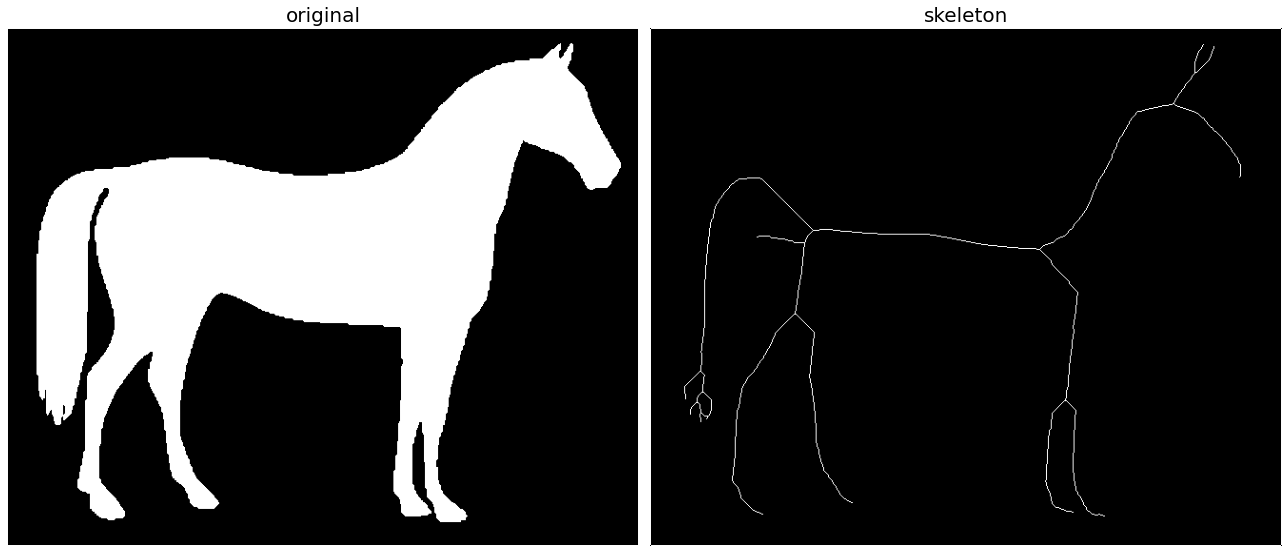

In [22]:
from skimage.morphology import skeletonize
from skimage import img_as_bool, io, color, morphology
import matplotlib.pyplot as plt
from skimage.util import invert
from scipy import ndimage

horse_img = io.imread('horse.png')[:,:,:3]
thinningBinary(horse_img)

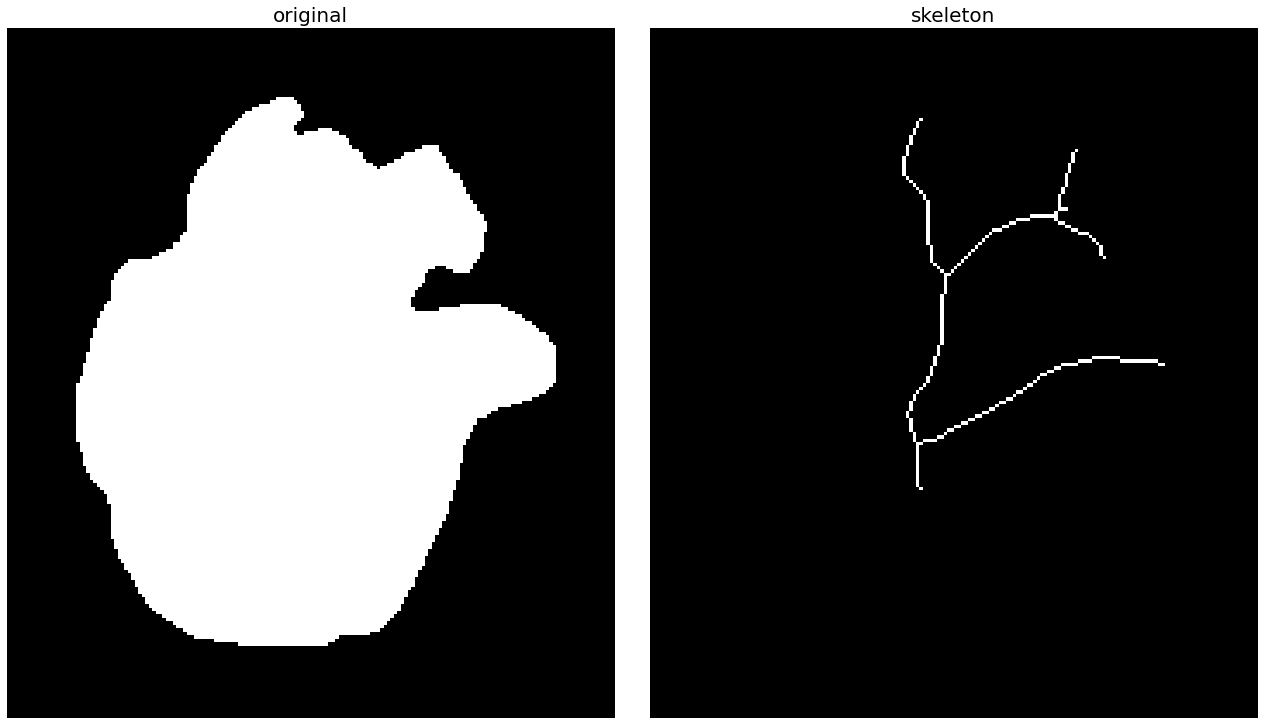

In [23]:
img = io.imread('CIBUv.png')[:,:,:3]
thinningBinary(img)

# Applying Thinning operation on color images

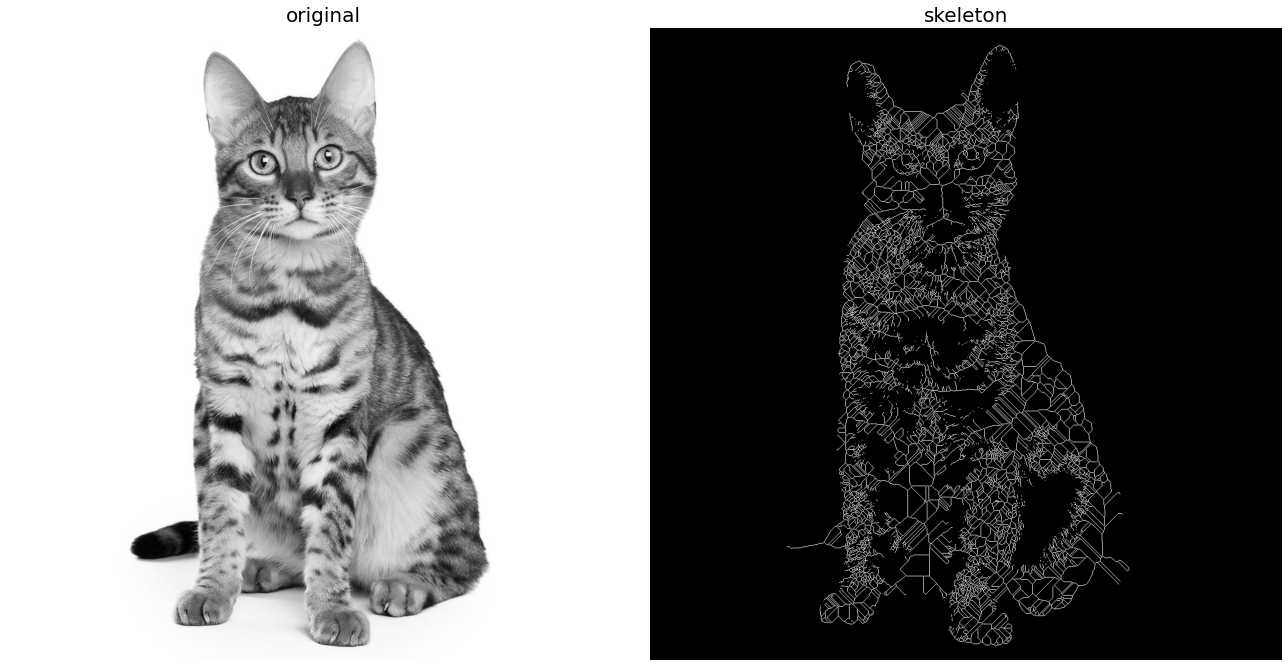

In [24]:
from skimage.morphology import skeletonize,skeletonize_3d
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

img = io.imread('cat.jpeg')
img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(_, binarized) = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
image = img_as_bool(binarized)
skeleton = skeletonize_3d(image)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img_gray, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

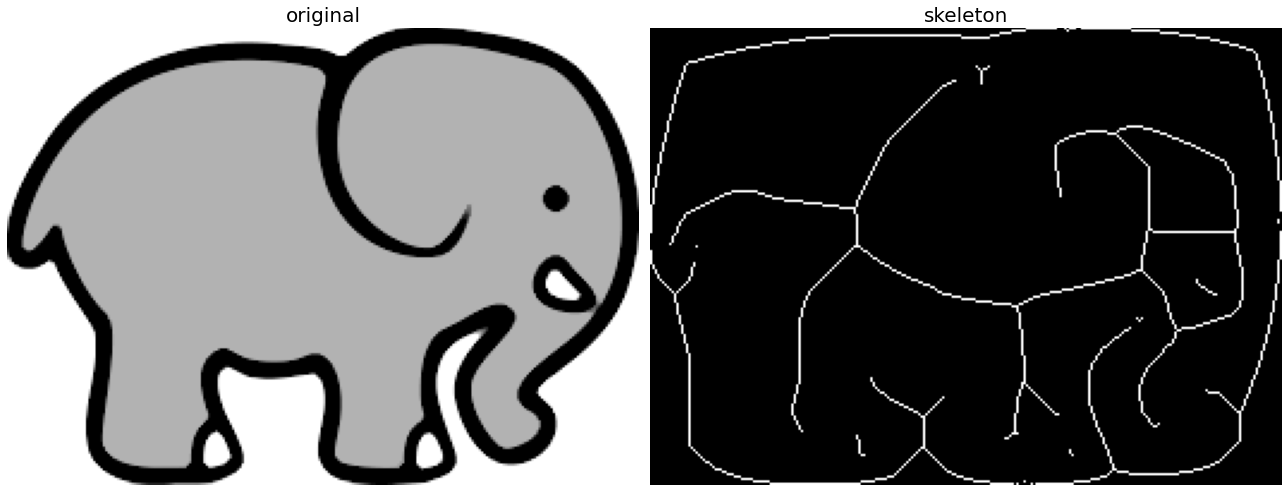

In [25]:
img = cv2.imread('elephant.png',0)
img = cv2.medianBlur(img,5)
elephant_th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
image = img_as_bool(elephant_th)
skeleton = skeletonize(image)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

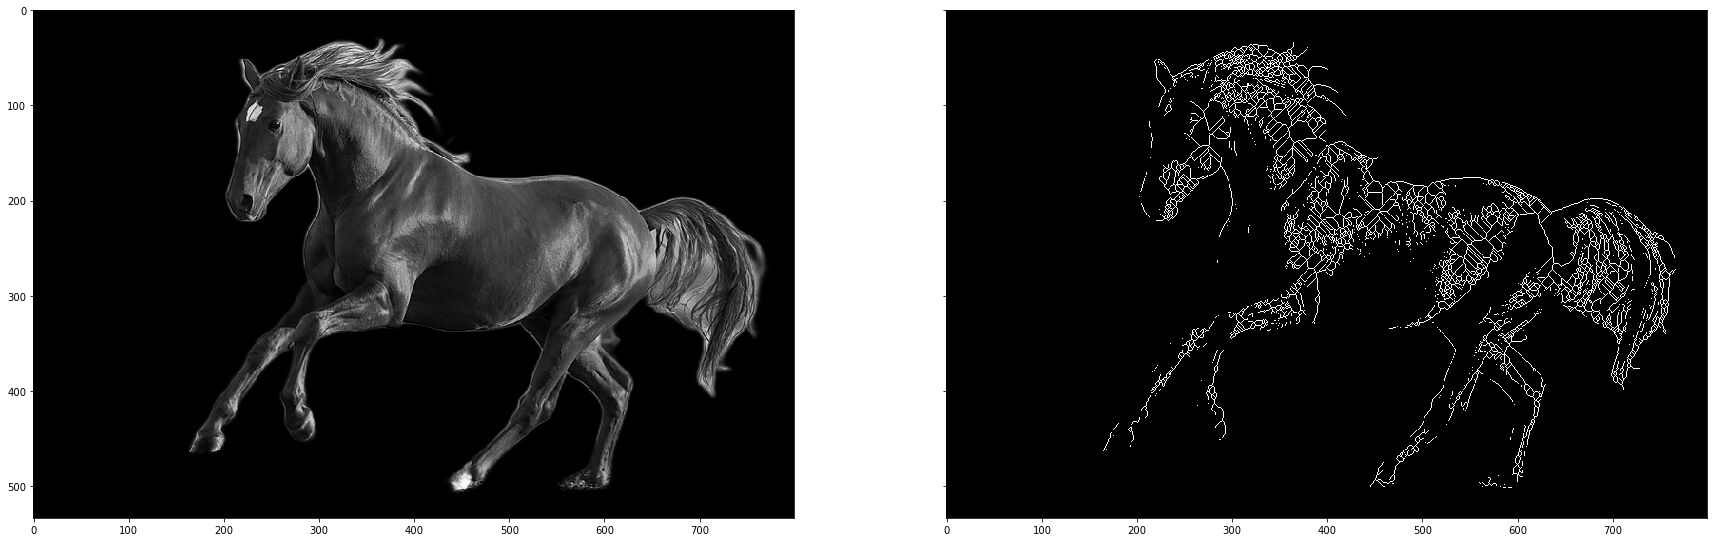

In [26]:
input = cv2.imread('horse.jpeg')
output = remove(input)

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

image = img_as_bool(thresh)
out = skeletonize_3d(image)

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

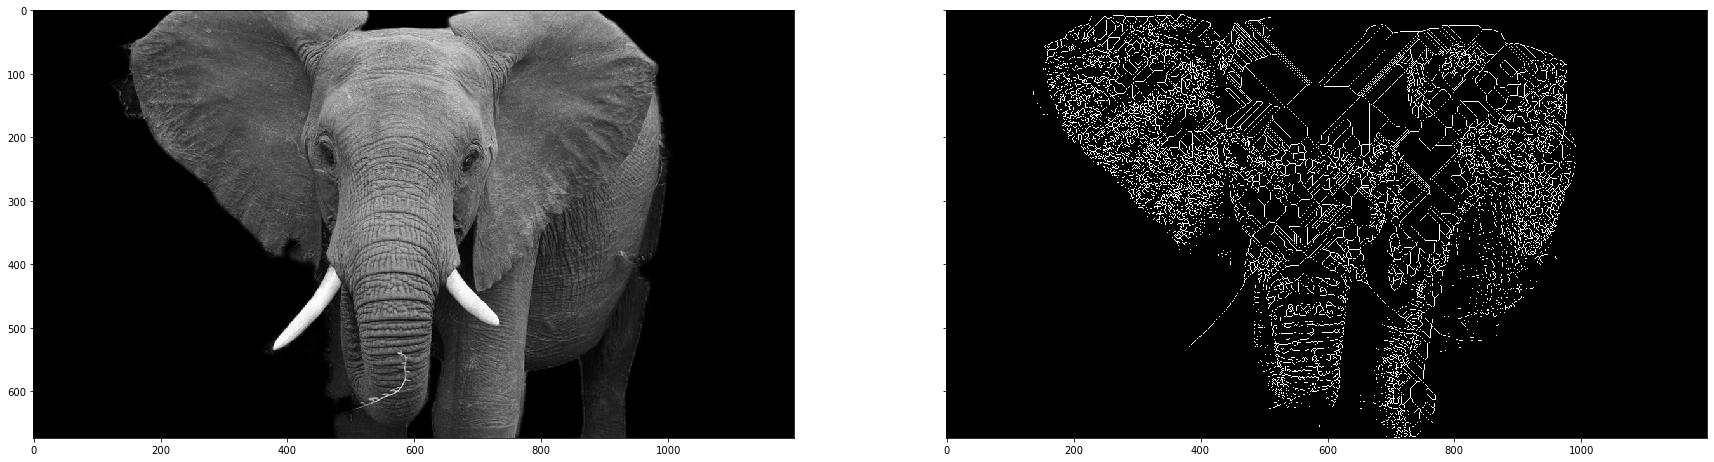

In [27]:
input = cv2.imread('elephant.jpeg')
output = remove(input)

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

image = img_as_bool(thresh)
out = skeletonize_3d(image)

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

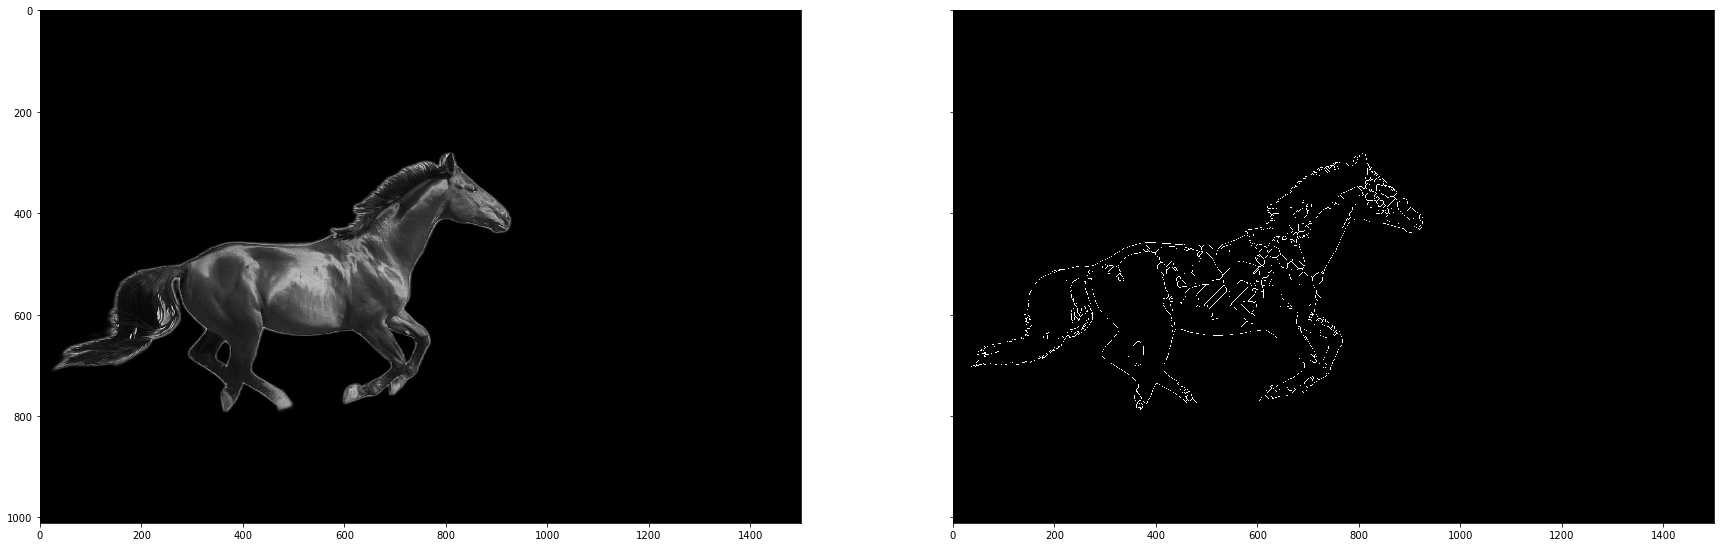

In [28]:
input = cv2.imread('horse1.jpeg')
output = remove(input)

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

image = img_as_bool(thresh)
out = skeletonize_3d(image)

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10),
                         sharex=True, sharey=True)
ax0.imshow(gray, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()